<h1 align="center"> CSE 242 Lab Session 2, Fall 2022


**Task 1:** Getting started with **Scikit-learn** 

The official website is [here](https://scikit-learn.org/stable/install.html#).

## Installation

Go through this [link](https://scikit-learn.org/stable/install.html) and follow the instructions if you haven't installed this library.

<!-- ![install]('/content/drive/My Drive/CSE242/Lab_Sessions/install.png) -->


## Cheatsheat
[![scikit-learn algorithm map](figures_lab/ml_map.png)](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

## Existed helpful materials on Scikit-learn

- [Basic content](https://scikit-learn.org/stable/user_guide.html)
- [Examples](https://scikit-learn.org/stable/auto_examples/index.html)
- [Tutorials](https://scikit-learn.org/stable/tutorial/index.html#)

## Types/Categories of Machine Learning

## Application 1: A simple classification task

#### Before you train with scikit-learn implemented models, double check:

1. Features $X$ and response/targets $y$ are **separate objects**;
2. Features $X$ and response/targets $y$ are of the **numeric** type;
3. Features $X$ and response/targets $y$ are **NumPy arrays**.

Prepare train dataset

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

# Generate synthetic 100 separable points
#random_state is picked to reproduce this random distribution
X_train, y_train = datasets.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.80)

print(X_train)
print(y_train)

[[ 3.78585628  1.96688602]
 [ 1.1372926   0.54740762]
 [-0.02596621  4.92577961]
 [ 0.26604148  2.71915015]
 [ 3.00569136  1.15121775]
 [ 1.34880003  3.07479238]
 [ 1.01287689  4.15404025]
 [ 3.59362114  2.08207549]
 [ 0.66640862  4.06194513]
 [ 1.41253979  0.34602384]
 [ 0.69794036  4.4288665 ]
 [ 1.75992205  0.70616032]
 [ 1.14289006  5.08509856]
 [ 0.25043139  4.34534364]
 [ 1.84086482  1.53962878]
 [ 3.96178334  1.65324725]
 [ 2.95657626  0.03371845]
 [ 0.43830172  4.0161448 ]
 [ 1.00254159  0.52839598]
 [ 1.43933466  1.32906301]
 [ 1.10022802  4.60631734]
 [ 0.72702805  4.3487196 ]
 [ 1.46361712  2.13207534]
 [ 0.04415021  5.02444852]
 [ 2.47388885  0.76042659]
 [ 0.893695    4.63226613]
 [ 1.45946366  0.23651283]
 [ 0.9846701   5.73248372]
 [ 1.33136066  4.57072679]
 [ 2.29385806  1.95877238]
 [ 2.35640795  0.01814303]
 [ 1.02948386  4.54576485]
 [ 1.17176085  0.93939572]
 [ 2.37207289  0.02321445]
 [ 1.70714468  2.37707464]
 [ 1.91929374  4.15984746]
 [ 1.51580139  0.92312811]
 

Visualize the train data: clearly well separable.

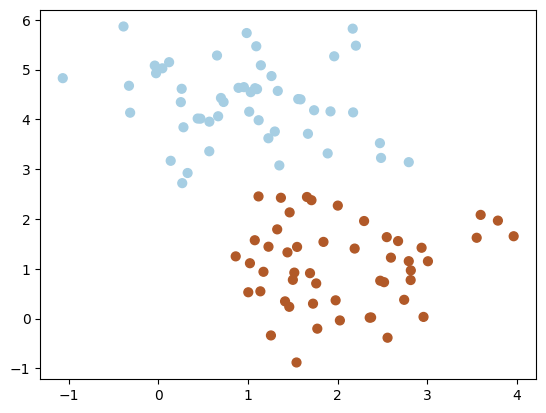

In [3]:
# plot the data
#s is size of points, c is color maping using cmap
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, **dict(cmap='Paired', s=40))

Train with a machine learning model

In [4]:
# fit the support vector classifier model
from sklearn.svm import SVC
#Specifies the kernel type to be used in the algorithm
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

Prepare test data for predictions

In [25]:
# Generate test samples to predict
X_test, y_test = datasets.make_blobs(n_samples=50, centers=2,
                   random_state=0, cluster_std=1.5)

# predict the labels
y_pred = model.predict(X_test)

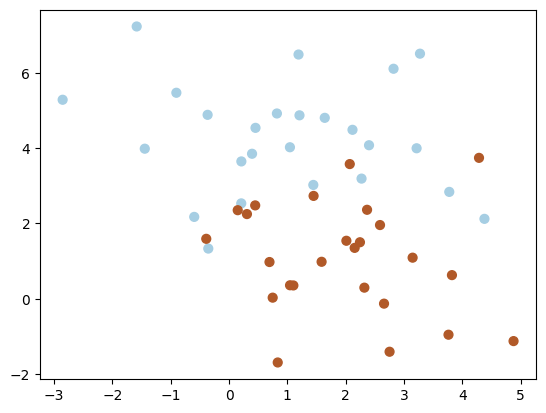

In [26]:
# plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, **dict(cmap='Paired', s=40))

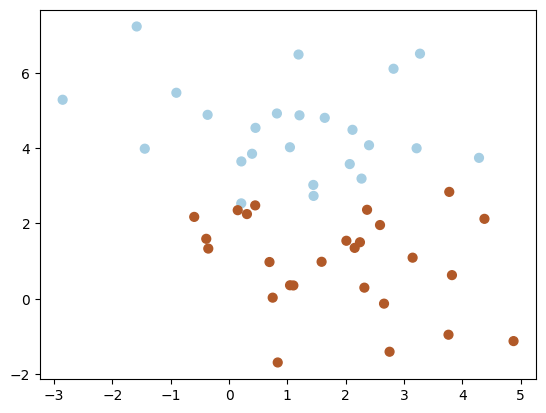

In [27]:
# plot the predicted data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, **dict(cmap='Paired', s=40))

In [28]:
from sklearn.metrics import accuracy_score
# Return the fraction of correctly classified samples
print(f"Test accuracy is {accuracy_score(y_test, y_pred)}")

Test accuracy is 0.86


### When noisy label presents...

In [29]:
# Inject noisy labels to clean train labels
import random
y_train_noisy = y_train
for i in range(len(y_train_noisy)):
    tmp_prob = random.uniform(0, 1) # 30% of the points will be flipped 1<-->0
    if tmp_prob < 0.3: 
        y_train_noisy[i] = 1 - y_train[i]
y_train_noisy

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

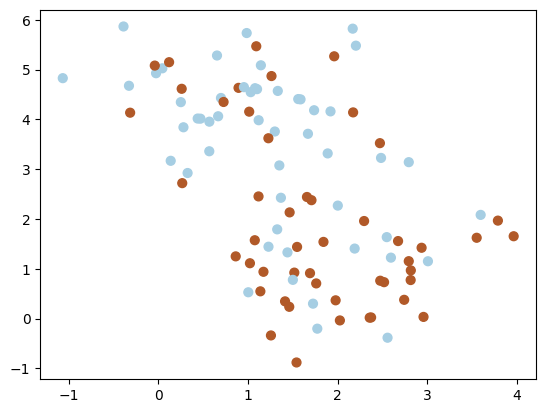

In [30]:
# plot the noisy train data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_noisy, **dict(cmap='Paired', s=40))

In [31]:
model_noisy = SVC(kernel='linear')
model_noisy.fit(X_train, y_train_noisy)
# predict the labels
y_pred_noisy = model_noisy.predict(X_test)

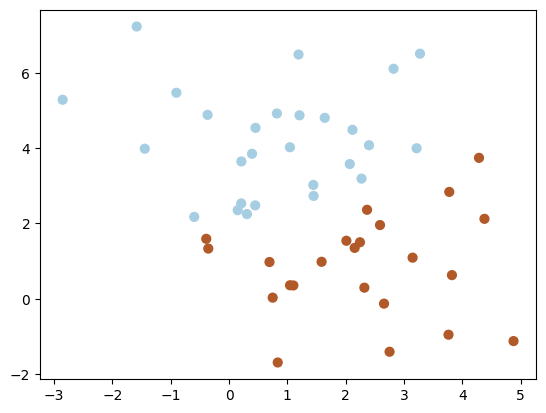

In [33]:
# plot the test data
#gouped into two sets, even with 30% noise level
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_noisy, **dict(cmap='Paired', s=40))

In [35]:
print(f"Test accuracy is {accuracy_score(y_test, y_pred_noisy)}")

Test accuracy is 0.84


Huge performance degradation even on this toy example.

## Application 2: A simple regression task (modified from Jake VanderPlas)

Generate synthetic data for a regression task

In [41]:
def reg_data(N=20, err=0.6, seed=1):
    # randomly sample the data
    rng = np.random.RandomState(seed)
    X = rng.rand(N, 1) ** 1.6
    y =  - 1. / (X.ravel() + 0.1)
    #adding noise?
    if err > 0:
        y += err * rng.randn(N)
    return X, y

Visualize the train data

[2.46748405e-01 5.91623058e-01 4.93547165e-07 1.47494526e-01
 4.64037276e-02 2.21112461e-02 6.79504201e-02 1.82658130e-01
 2.27854547e-01 3.71796862e-01 2.48808347e-01 5.46169624e-01
 7.88763908e-02 8.12239604e-01 3.16290530e-03 5.27478035e-01
 2.47016186e-01 3.93979136e-01 4.32237782e-02 7.49929407e-02]
[ -2.20367373  -2.10580905 -10.10340757  -4.56720845  -6.80509893
  -7.83956479  -6.61450963  -2.85100847  -2.50917865  -1.81805967
  -2.3263903   -1.95781798  -5.66418682  -1.65766489  -9.85413957
  -1.275468    -3.29670641  -2.26242911  -7.39438448  -6.22163962]


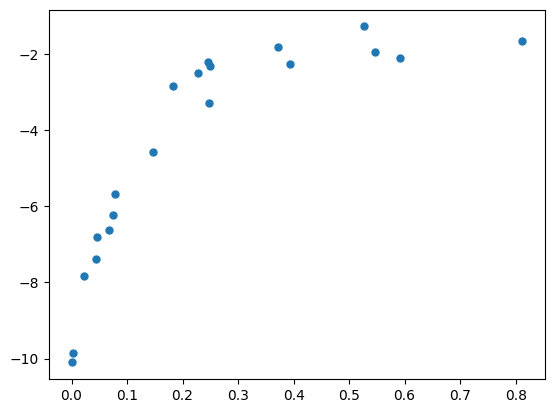

In [43]:
X_train, y_train = reg_data()
print(X_train.ravel())
print(y_train)

#if we did not have noise, we would simply be plotting X values at y(X) = - 1. / (X.ravel() + 0.1), from above
plt.scatter(X_train.ravel(), y_train, s=25)

Now we compare the performance of two regression models: **linear regression** and **polynomial ones**.

In [47]:
# Write the models for linear and polynomial regression.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

Fit on the train data

Text(0.5, 1.0, 'High-variance model: Overfitting')

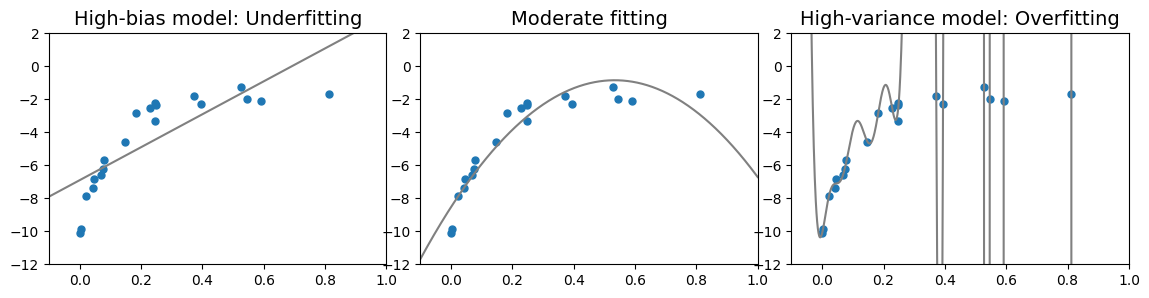

In [46]:
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X_train, y_train)
model2 = PolynomialRegression(2).fit(X_train, y_train)
model20 = PolynomialRegression(20).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)
ax[0].scatter(X_train.ravel(), y_train, s=25)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -12, 2])
ax[0].set_title('High-bias model: Underfitting', size=14)

ax[1].scatter(X_train.ravel(), y_train, s=25)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -12, 2])
ax[1].set_title('Moderate fitting', size=14)


ax[2].scatter(X_train.ravel(), y_train, s=25)
ax[2].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[2].axis([-0.1, 1.0, -12, 2])
ax[2].set_title('High-variance model: Overfitting', size=14)

Now let's check their performances on the new test data.

Text(0.9, 0.0, 'test score: $R^2$ = -7.9e+18')

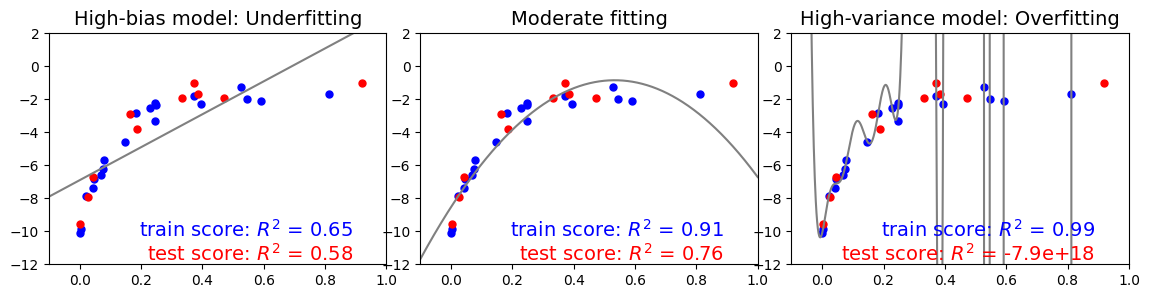

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

X_test, y_test = reg_data(10, seed=10086)

ax[0].scatter(X_train.ravel(), y_train, s=25, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -12, 2])
ax[0].set_title('High-bias model: Underfitting', size=14)
ax[0].scatter(X_test.ravel(), y_test, s=25, c='red')
ax[0].text(0.9, 0.1, "train score: $R^2$ = {0:.2f}".format(model1.score(X_train, y_train)),
           ha='right', va='bottom', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.9, 0.0, "test score: $R^2$ = {0:.2f}".format(model1.score(X_test, y_test)),
           ha='right', va='bottom', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X_train.ravel(), y_train, s=25, c='blue')
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -12, 2])
ax[1].set_title('Moderate fitting', size=14)
ax[1].scatter(X_test.ravel(), y_test, s=25, c='red')
ax[1].text(0.9, 0.1, "train score: $R^2$ = {0:.2g}".format(model2.score(X_train, y_train)),
           ha='right', va='bottom', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.9, 0.0, "test score: $R^2$ = {0:.2g}".format(model2.score(X_test, y_test)),
           ha='right', va='bottom', transform=ax[1].transAxes, size=14, color='red')

ax[2].scatter(X_train.ravel(), y_train, s=25, c='blue')
ax[2].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[2].axis([-0.1, 1.0, -12, 2])
ax[2].set_title('High-variance model: Overfitting', size=14)
ax[2].scatter(X_test.ravel(), y_test, s=25, c='red')
ax[2].text(0.9, 0.1, "train score: $R^2$ = {0:.2g}".format(model20.score(X_train, y_train)),
           ha='right', va='bottom', transform=ax[2].transAxes, size=14, color='blue')
ax[2].text(0.9, 0.0, "test score: $R^2$ = {0:.2g}".format(model20.score(X_test, y_test)),
           ha='right', va='bottom', transform=ax[2].transAxes, size=14, color='red')

$R^2\in [0,1]$. The regression performance is better when $R^2$ approaches to 1.

## Additional Machine Learning Resources

- **Datasets to explore:** Google dataset, Kaggle, Github, etc;
- **Free computing (GPU) resources:** Google Colab, kaggle;
- **Tutorials:** Sklearn, Kaggle, many blogs, everywhere in Google.
- **More practice, better understandings!**